# Mohammed Ashraf Mohammed

# Project : STOCK_MARKET _PREDICTION

In [1]:
#for data preprocessing 
import pandas as pd
import numpy as np 
#for data visualization 
import matplotlib.pyplot as plt
import seaborn as sns
#for MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
#for StandardScaler
from sklearn.preprocessing import StandardScaler
#for label_encoding
from sklearn.preprocessing import LabelEncoder
#for the model 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

In [3]:
#Laoding Data
df=pd.read_csv('infolimpioavanzadoTarget.csv')

# Task:
Take stock price of any company you wantand predicts its price by using LSTM. Use onlyJupyter notebook code.

# Description:

1-open: The opening price of the stock for a particular time period.

2-high: The highest price reached by the stock during the same time period.

3-low: The lowest price reached by the stock during the same time period.

4-close: The closing price of the stock for the specified time period.

5-adjclose: The adjusted closing price accounts for events such as dividends,
stock splits, etc., providing a more accurate reflection of the stock's value.

6-volume: The total number of shares traded during the specified time period.

7-ticker: Ticker symbol representing the stock on the stock exchange.

8-RSIadjclose15: Relative Strength Index (RSI) based on the adjusted closing prices over a 15-day period.

9-RSIvolume15: RSI based on the trading volume over a 15-day period.

10-RSIadjclose25: RSI based on the adjusted closing prices over a 25-day period.

11-high-15: The highest price reached by the stock during the last 15 days. This column represents the highest trading price observed within a specific time window, providing insights into recent price trends.

12-K-15: Stochastic oscillator %K based on the closing prices over a 15-day period. %K is a measure of the current closing price in relation to the high-low range over a specified period, often used to identify potential trend reversals.

13-D-15: Stochastic oscillator %D based on the %K values over a 15-day period. %D is a smoothed average of %K and is used to generate trading signals.
11-stochastic-k-15: Stochastic oscillator %K based on the closing prices over a 15-day period.

14-stochastic-d-15: Stochastic oscillator %D based on the %K values over a 15-day period.

15-stochastic-kd-15: The combination of %K and %D values from the stochastic oscillator over a 15-day period.

16-volumenrelativo: Relative volume, indicating the trading volume relative to the average volume over a specified period.

17-diff: The difference between two values (exact context would depend on the specific calculation).

18-INCREMENTO: Indicates whether there is an increase in some variable (exact context depends on the dataset).

19-TARGET: The target variable, often used in machine learning to predict some outcome or classification.

20-day, month, year: Date components extracted from the timestamp, representing the day, month, and year, respectively.


In [4]:
#let's see the data
df

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7776,2022-12-23,23.250000,23.540001,23.250000,23.290001,22.699928,4900,ATLO,60.782255,47.081752,...,23.600000,26.223672,27.022465,26.223672,27.022465,-0.798793,0.333333,NaN,NaN,0
7777,2022-12-27,23.350000,23.610001,23.250000,23.350000,22.758406,9200,ATLO,62.022801,47.747952,...,23.610001,30.764722,28.003602,30.764722,28.003602,2.761119,0.625850,NaN,NaN,0
7778,2022-12-28,23.450001,23.570000,23.219999,23.350000,22.758406,15200,ATLO,62.022801,48.713225,...,23.610001,30.764722,29.251039,30.764722,29.251039,1.513683,1.034014,NaN,NaN,0
7779,2022-12-29,23.330000,23.740000,23.330000,23.610001,23.011820,7100,ATLO,67.186408,47.445460,...,23.740000,46.457382,35.995609,46.457382,35.995609,10.461773,0.482993,NaN,NaN,0


In [5]:
#First Columns
df.head()

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0


In [6]:
#Last Columns 
df.tail()

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
7776,2022-12-23,23.250000,23.540001,23.250000,23.290001,22.699928,4900,ATLO,60.782255,47.081752,...,23.600000,26.223672,27.022465,26.223672,27.022465,-0.798793,0.333333,NaN,NaN,0
7777,2022-12-27,23.350000,23.610001,23.250000,23.350000,22.758406,9200,ATLO,62.022801,47.747952,...,23.610001,30.764722,28.003602,30.764722,28.003602,2.761119,0.625850,NaN,NaN,0
7778,2022-12-28,23.450001,23.570000,23.219999,23.350000,22.758406,15200,ATLO,62.022801,48.713225,...,23.610001,30.764722,29.251039,30.764722,29.251039,1.513683,1.034014,NaN,NaN,0
7779,2022-12-29,23.330000,23.740000,23.330000,23.610001,23.011820,7100,ATLO,67.186408,47.445460,...,23.740000,46.457382,35.995609,46.457382,35.995609,10.461773,0.482993,NaN,NaN,0
7780,2022-12-30,23.680000,23.760000,23.610001,23.610001,23.011820,7100,ATLO,67.186408,47.445460,...,23.760000,45.784072,41.002059,45.784072,41.002059,4.782013,0.482993,NaN,NaN,0


In [7]:
#Information about data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7781 entries, 0 to 7780
Columns: 1285 entries, date to TARGET
dtypes: float64(1280), int64(3), object(2)
memory usage: 76.3+ MB


In [8]:
#let's see just the columns of the data 
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'adjclose', 'volume', 'ticker',
       'RSIadjclose15', 'RSIvolume15',
       ...
       'high-15', 'K-15', 'D-15', 'stochastic-k-15', 'stochastic-d-15',
       'stochastic-kd-15', 'volumenrelativo', 'diff', 'INCREMENTO', 'TARGET'],
      dtype='object', length=1285)

In [9]:
#let's see the type of columns of the data 
df.dtypes

date                 object
open                float64
high                float64
low                 float64
close               float64
                     ...   
stochastic-kd-15    float64
volumenrelativo     float64
diff                float64
INCREMENTO          float64
TARGET                int64
Length: 1285, dtype: object

In [10]:
#size of data
df.size

9998585

In [11]:
#shape of data
df.shape

(7781, 1285)

# Data preprocessing

In [12]:
#check duplicated values
#we see that there are no duplicated values
df.duplicated().sum()

0

In [13]:
#checking data if there are nulls or not 
df.isnull().sum()

date                  0
open                  0
high                  0
low                   0
close                 0
                   ... 
stochastic-kd-15    587
volumenrelativo     215
diff                155
INCREMENTO          155
TARGET                0
Length: 1285, dtype: int64

In [14]:
#split Date into Day&month&year 
df['date'] = pd.to_datetime(df['date'])
# Extracting day, month, and year into new columns using .loc
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [15]:
#my data after spiltting Date
df.head()

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET,day,month,year
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0,3,1,2022
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0,4,1,2022
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0,5,1,2022
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0,6,1,2022
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0,7,1,2022


In [16]:
# we will deal with miss values by Mean&Mode&Median
# Filling missing values with the mean of each respective column
df['stochastic-kd-15'] = df['stochastic-kd-15'].fillna(df['stochastic-kd-15'].mean())
df['volumenrelativo'] = df['volumenrelativo'].fillna(df['volumenrelativo'].mean())
df['diff'] = df['diff'].fillna(df['diff'].mean())
df['INCREMENTO'] = df['INCREMENTO'].fillna(df['INCREMENTO'].mean())

In [17]:
#checking data after filling nulls with the mean of each respective column
df.isnull().sum()

date          0
open          0
high          0
low           0
close         0
             ..
INCREMENTO    0
TARGET        0
day           0
month         0
year          0
Length: 1288, dtype: int64

In [18]:
#after creating ['day','month','year'] we see that we don't need the column 'date'
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'adjclose', 'volume', 'ticker',
       'RSIadjclose15', 'RSIvolume15',
       ...
       'stochastic-k-15', 'stochastic-d-15', 'stochastic-kd-15',
       'volumenrelativo', 'diff', 'INCREMENTO', 'TARGET', 'day', 'month',
       'year'],
      dtype='object', length=1288)

In [19]:
#let's drop column date
df.drop('date', axis=1, inplace=True)

In [20]:
df.dtypes

open          float64
high          float64
low           float64
close         float64
adjclose      float64
               ...   
INCREMENTO    float64
TARGET          int64
day             int32
month           int32
year            int32
Length: 1287, dtype: object

In [21]:
df['RSIadjclose15'].dtypes

dtype('float64')

In [22]:
#Description of data
df.describe()

,open,high,low,close,adjclose,volume,RSIadjclose15,RSIvolume15,RSIadjclose25,RSIvolume25,...,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET,day,month,year
count,7781.000000,7781.000000,7781.000000,7781.000000,7781.000000,7.781000e+03,7316.000000,7316.000000,7006.000000,7006.000000,...,7262.000000,7194.000000,7781.000000,7781.000000,7781.000000,7781.000000,7781.000000,7781.000000,7781.000000,7781.0
mean,34.990220,35.655999,34.301243,34.964414,34.483147,7.586022e+05,46.817434,49.814790,46.966016,49.898659,...,18.673824,18.704812,0.298413,inf,-0.259186,-2.674224,0.183010,15.645418,6.549801,2022.0
std,99.841502,101.451058,98.073945,99.790823,98.603879,3.934491e+06,11.672838,5.002664,8.760961,3.420371,...,75.723295,74.210933,14.097981,NaN,7.260823,265.582353,0.386699,8.782437,3.430881,0.0
min,0.410000,0.435000,0.405000,0.408000,0.408000,0.000000e+00,6.837461,35.303213,17.693637,39.520876,...,-668.212635,-626.263336,-211.219037,0.000000,-90.538818,-23399.465955,0.000000,1.000000,1.000000,2022.0
25%,4.050000,4.130000,3.980000,4.030000,3.960000,1.080000e+04,38.946316,47.182234,40.954487,48.266978,...,6.153839,8.336837,-5.907413,0.647972,-0.400000,-4.351329,0.000000,8.000000,4.000000,2022.0
50%,10.080000,10.110000,10.005000,10.080000,10.061000,8.406000e+04,46.259711,48.356834,46.459477,48.961162,...,28.484828,28.478797,0.298413,1.024096,-0.030000,-0.420877,0.000000,15.000000,7.000000,2022.0
75%,24.350000,24.500000,24.080000,24.250000,22.466007,6.724000e+05,54.061089,50.902284,52.289893,50.527067,...,59.688404,58.664021,5.906731,1.759724,0.230000,2.649995,0.000000,23.000000,10.000000,2022.0
max,795.739990,799.359985,784.960022,797.489990,783.376221,1.615550e+08,96.365095,99.622735,91.023108,97.782293,...,100.000000,100.000000,198.156313,inf,120.256775,425.000000,1.000000,31.000000,12.000000,2022.0


In [23]:
#unique values of ticker
df['ticker'].unique()

array(['ASLE', 'ASLN', 'ASMB', 'ASML', 'ASND', 'ASO', 'ASPA', 'ASPAU',
       'ASPS', 'ASRT', 'ASRV', 'ASTC', 'ASTE', 'ASTL', 'ASTR', 'ASTS',
       'ASUR', 'ASYS', 'ATAI', 'ATCOL', 'ATEC', 'ATER', 'ATEX', 'ATHA',
       'ATHE', 'ATHX', 'ATIF', 'ATLC', 'ATLCL', 'ATLCP', 'ATLO'],
      dtype=object)

In [24]:
#unique values of RSIadjclose15
df['RSIadjclose15'].unique()

array([        nan, 11.00337953, 10.79201329, ..., 60.78225484,
       62.02280061, 67.18640782])

In [25]:
#Replce NAN values with mean of the column RSIadjclose15
mean_value = df['RSIadjclose15'].mean()
df['RSIadjclose15'].fillna(mean_value, inplace=True)

In [26]:
#see RSIadjclose15 column after replacing NaN values with mean of RSIadjclose15
df['RSIadjclose15'].unique()

array([46.81743363, 11.00337953, 10.79201329, ..., 60.78225484,
       62.02280061, 67.18640782])

In [27]:
#unique values of RSIvolume15
df['RSIvolume15'].unique()

array([        nan, 57.10038289, 53.16786239, ..., 47.74795174,
       48.71322489, 47.44546045])

In [28]:
#Replce NAN values with mean of the column RSIvolume15
mean_value = df['RSIvolume15'].mean()
df['RSIvolume15'].fillna(mean_value, inplace=True)

In [29]:
#see RSIvolume15 column after replacing NaN values with mean of RSIvolume15
df['RSIvolume15'].unique()

array([49.81478983, 57.10038289, 53.16786239, ..., 47.74795174,
       48.71322489, 47.44546045])

In [30]:
#unique values of RSIadjclose25
df['RSIadjclose25'].unique()

array([        nan, 40.64723171, 43.06895491, ..., 60.31676228,
       60.31676228, 63.6857944 ])

In [31]:
#Replce NAN values with mean of the column RSIadjclose25
mean_value = df['RSIadjclose25'].mean()
df['RSIadjclose25'].fillna(mean_value, inplace=True)

In [32]:
#see RSIadjclose25 column after replacing NaN values with mean of RSIadjclose25
df['RSIadjclose25'].unique()

array([46.96601625, 40.64723171, 43.06895491, ..., 60.31676228,
       60.31676228, 63.6857944 ])

In [33]:
#unique values of stochastic-k-15
df['stochastic-k-15'].unique()

array([        nan, 13.81215586,  9.83424823, ..., 30.76472185,
       46.457382  , 45.78407172])

In [34]:
#Replce NAN values with mean of the column stochastic-k-15
mean_value = df['stochastic-k-15'].mean()
df['stochastic-k-15'].fillna(mean_value, inplace=True)

In [35]:
#see stochastic-k-15 column after replacing NaN values with mean of stochastic-k-15
df['stochastic-k-15'].unique()

array([18.6738243 , 13.81215586,  9.83424823, ..., 30.76472185,
       46.457382  , 45.78407172])

In [36]:
#unique values of stochastic-d-15
df['stochastic-d-15'].unique()

array([        nan, 11.16150803,  7.84713079, ..., 29.25103868,
       35.99560856, 41.00205852])

In [37]:
#Replce NAN values with mean of the column stochastic-d-15
mean_value = df['stochastic-d-15'].mean()
df['stochastic-d-15'].fillna(mean_value, inplace=True)

In [38]:
#see stochastic-d-15 column after replacing NaN values with mean of stochastic-d-15
df['stochastic-d-15'].unique()

array([18.70481194, 11.16150803,  7.84713079, ..., 29.25103868,
       35.99560856, 41.00205852])

In [39]:
#seeing our data after removing NaN values from RSIadjclose15 & RSIvolume15 & RSIadjclose25 & stochastic-k-15 & stochastic-d-15
df

,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,RSIadjclose25,...,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET,day,month,year
0,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,46.817434,49.814790,46.966016,...,18.673824,18.704812,0.298413,0.919758,-1.900001,-9.664295,0,3,1,2022
1,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,46.817434,49.814790,46.966016,...,18.673824,18.704812,0.298413,1.110440,-1.379999,-7.247895,0,4,1,2022
2,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,46.817434,49.814790,46.966016,...,18.673824,18.704812,0.298413,0.889560,-0.930000,-5.201344,0,5,1,2022
3,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,46.817434,49.814790,46.966016,...,18.673824,18.704812,0.298413,1.497843,-0.360000,-2.177856,0,6,1,2022
4,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,46.817434,49.814790,46.966016,...,18.673824,18.704812,0.298413,1.188956,-0.120000,-0.758054,0,7,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7776,23.250000,23.540001,23.250000,23.290001,22.699928,4900,ATLO,60.782255,47.081752,59.518051,...,26.223672,27.022465,-0.798793,0.333333,-0.259186,-2.674224,0,23,12,2022
7777,23.350000,23.610001,23.250000,23.350000,22.758406,9200,ATLO,62.022801,47.747952,60.316762,...,30.764722,28.003602,2.761119,0.625850,-0.259186,-2.674224,0,27,12,2022
7778,23.450001,23.570000,23.219999,23.350000,22.758406,15200,ATLO,62.022801,48.713225,60.316762,...,30.764722,29.251039,1.513683,1.034014,-0.259186,-2.674224,0,28,12,2022
7779,23.330000,23.740000,23.330000,23.610001,23.011820,7100,ATLO,67.186408,47.445460,63.685794,...,46.457382,35.995609,10.461773,0.482993,-0.259186,-2.674224,0,29,12,2022


# Let's detect outliers

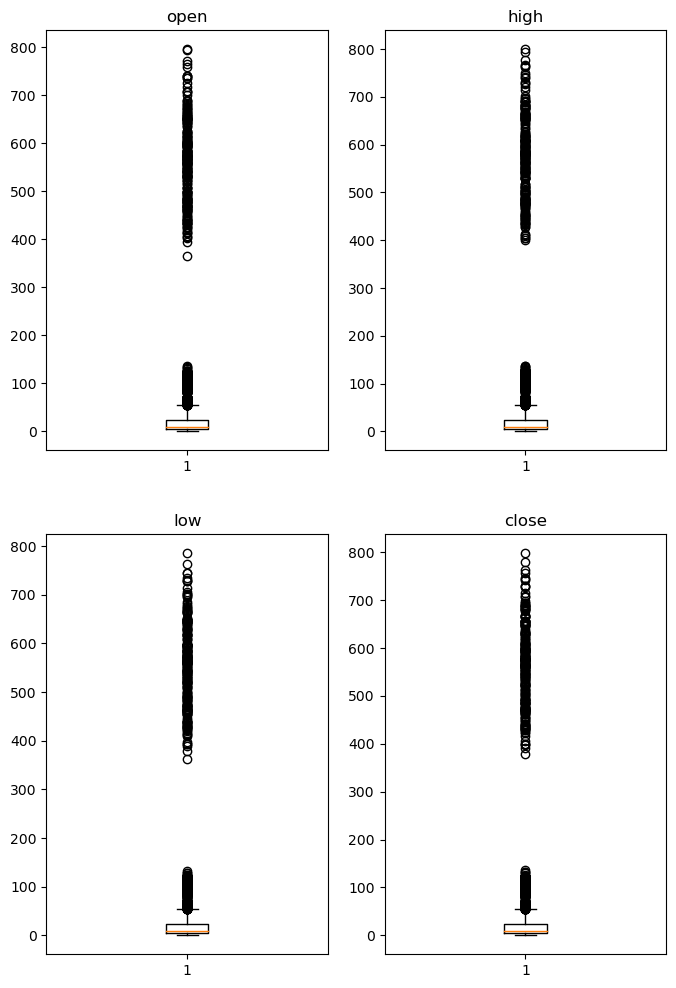

In [40]:
#visualizatoin to see the outliers

fig, ax = plt.subplots(2, 2, figsize=(8, 12))

# Boxplot for open
ax[0, 0].boxplot(x=df[['open']])
ax[0, 0].set_title('open')

# Boxplot for high
ax[0, 1].boxplot(x=df[['high']])
ax[0, 1].set_title('high')

# Boxplot for low
ax[1, 0].boxplot(x=df[['low']])
ax[1, 0].set_title('low')

# Boxplot for close
ax[1, 1].boxplot(x=df[['close']])
ax[1, 1].set_title('close')

plt.show()

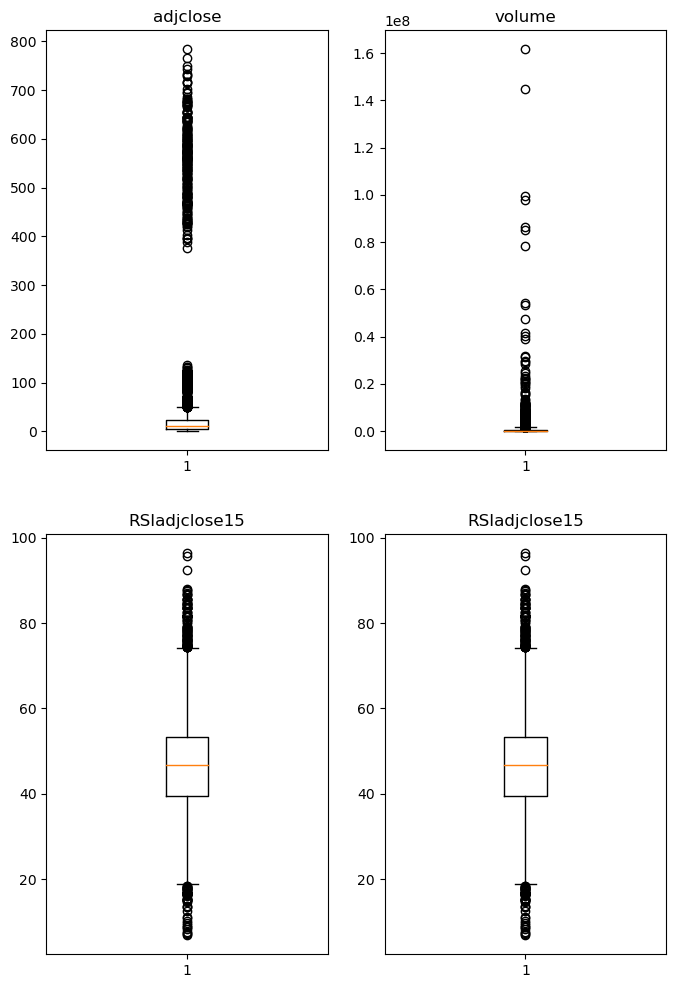

In [41]:
#visualizatoin to see the outliers

fig, ax = plt.subplots(2, 2, figsize=(8, 12))

# Boxplot for adjclose
ax[0, 0].boxplot(x=df[['adjclose']])
ax[0, 0].set_title('adjclose')

# Boxplot for volume
ax[0, 1].boxplot(x=df[['volume']])
ax[0, 1].set_title('volume')

# Boxplot for RSIadjclose15
ax[1, 0].boxplot(x=df[['RSIadjclose15']])
ax[1, 0].set_title('RSIadjclose15')

# Boxplot for close
ax[1, 1].boxplot(x=df[['RSIadjclose15']])
ax[1, 1].set_title('RSIadjclose15')

plt.show()

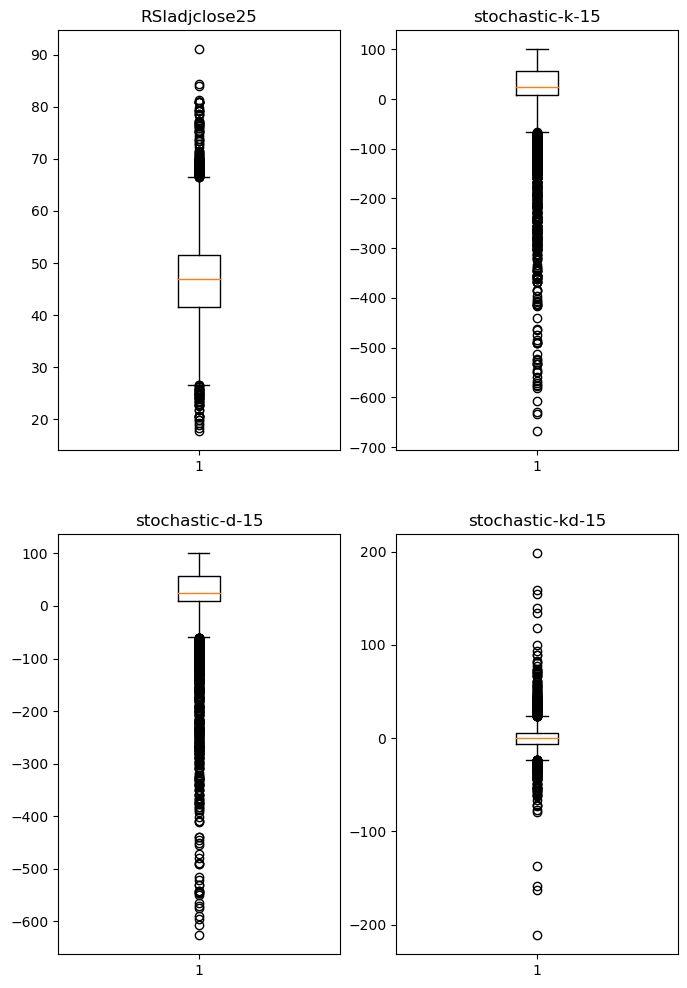

In [42]:
#visualizatoin to see the outliers

fig, ax = plt.subplots(2, 2, figsize=(8, 12))

# Boxplot for RSIadjclose25
ax[0, 0].boxplot(x=df[['RSIadjclose25']])
ax[0, 0].set_title('RSIadjclose25')

# Boxplot for stochastic-k-15
ax[0, 1].boxplot(x=df[['stochastic-k-15']])
ax[0, 1].set_title('stochastic-k-15')

# Boxplot for stochastic-d-15
ax[1, 0].boxplot(x=df[['stochastic-d-15']])
ax[1, 0].set_title('stochastic-d-15')

# Boxplot for stochastic-kd-15
ax[1, 1].boxplot(x=df[['stochastic-kd-15']])
ax[1, 1].set_title('stochastic-kd-15')

plt.show()

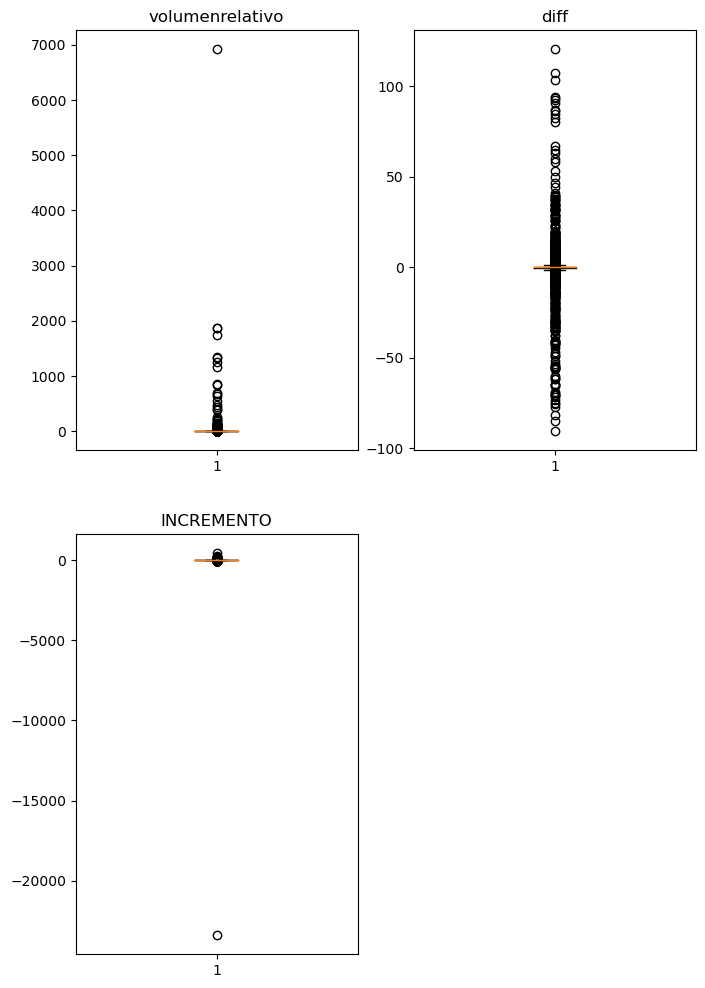

In [43]:
#visualizatoin to see the outliers

fig, ax = plt.subplots(2, 2, figsize=(8, 12))

# Boxplot for volumenrelativo
ax[0, 0].boxplot(x=df[['volumenrelativo']])
ax[0, 0].set_title('volumenrelativo')

# Boxplot for diff
ax[0, 1].boxplot(x=df[['diff']])
ax[0, 1].set_title('diff')

# Boxplot for INCREMENTO
ax[1, 0].boxplot(x=df[['INCREMENTO']])
ax[1, 0].set_title('INCREMENTO')

# Remove the last subplot (ax[1, 1]) from the layout
fig.delaxes(ax[1, 1])


plt.show()

In [44]:
#Q1 and Q3 calculations, and the interquartile range (IQR) for the 'open'
Q1_open=df['open'].quantile(0.25)
Q3_open=df['open'].quantile(0.75)
IQR_open=Q3_open - Q1_open
print(IQR_open)

20.300000190734863


In [45]:
df = df [~((df['open']<(Q1_open-1.5*IQR_open))|(df['open']>(Q3_open+1.5*IQR_open)))]

<Axes: xlabel='open'>

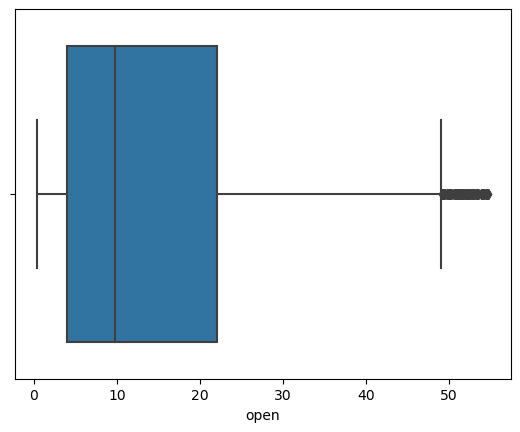

In [46]:
#let's visualize after detecting outliers in open
sns.boxplot(x='open', data=df)

In [47]:
#Q1 and Q3 calculations, and the interquartile range (IQR) for the 'high'
Q1_high=df['high'].quantile(0.25)
Q3_high=df['high'].quantile(0.75)
IQR_high=Q3_high - Q1_high
print(IQR_high)

18.28375005722046


In [48]:
df = df [~((df['high']<(Q1_high-1.5*IQR_high))|(df['high']>(Q3_high+1.5*IQR_high)))]

<Axes: xlabel='high'>

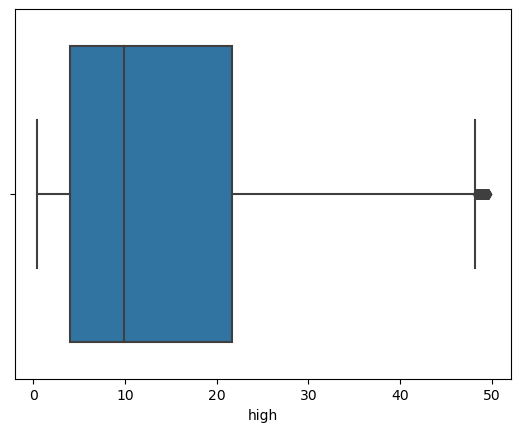

In [49]:
#let's visualize after detecting outliers in high
sns.boxplot(x='high', data=df)

In [50]:
#Q1 and Q3 calculations, and the interquartile range (IQR) for the 'low'
Q1_low=df['low'].quantile(0.25)
Q3_low=df['low'].quantile(0.75)
IQR_low=Q3_low - Q1_low
print(IQR_low)

16.969999313354492


In [51]:
df = df [~((df['low']<(Q1_low-1.5*IQR_low))|(df['low']>(Q3_low+1.5*IQR_low)))]

<Axes: xlabel='low'>

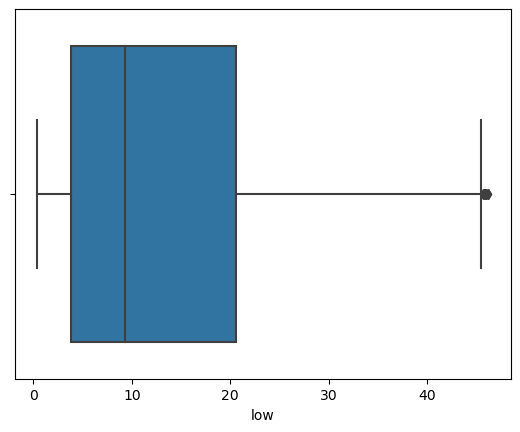

In [52]:
#let's visualize after detecting outliers in low
sns.boxplot(x='low', data=df)

In [53]:
#Q1 and Q3 calculations, and the interquartile range (IQR) for the 'close'
Q1_close=df['close'].quantile(0.25)
Q3_close=df['close'].quantile(0.75)
IQR_close=Q3_close - Q1_close
print(IQR_close)

17.0974999666214


In [54]:
df = df [~((df['close']<(Q1_close-1.5*IQR_close))|(df['close']>(Q3_close+1.5*IQR_close)))]

<Axes: xlabel='close'>

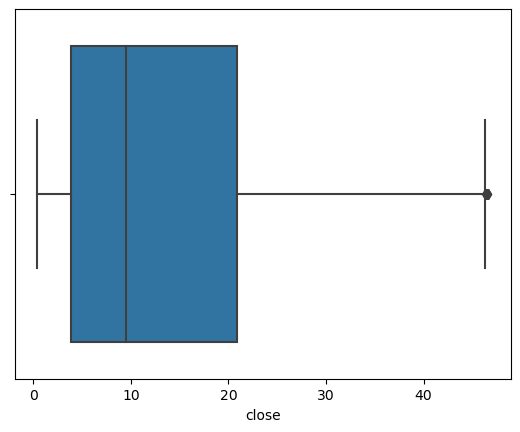

In [55]:
#let's visualize after detecting outliers in close
sns.boxplot(x='close', data=df)

In [56]:
#Q1 and Q3 calculations, and the interquartile range (IQR) for the 'adjclose'
Q1_adjclose=df['adjclose'].quantile(0.25)
Q3_adjclose=df['adjclose'].quantile(0.75)
IQR_adjclose=Q3_adjclose - Q1_adjclose
print(IQR_adjclose)

16.530753135681152


In [57]:
df = df [~((df['adjclose']<(Q1_adjclose-1.5*IQR_adjclose))|(df['adjclose']>(Q3_adjclose+1.5*IQR_adjclose)))]

<Axes: xlabel='adjclose'>

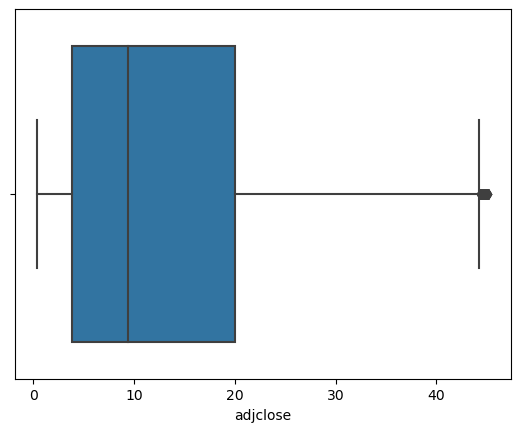

In [58]:
#let's visualize after detecting outliers in adjclose
sns.boxplot(x='adjclose', data=df)

In [59]:
#Q1 and Q3 calculations, and the interquartile range (IQR) for the 'volume'
Q1_volume=df['volume'].quantile(0.25)
Q3_volume=df['volume'].quantile(0.75)
IQR_volume=Q3_volume - Q1_volume
print(IQR_volume)

588875.0


In [60]:
df = df [~((df['volume']<(Q1_volume-1.5*IQR_volume))|(df['volume']>(Q3_volume+1.5*IQR_volume)))]

<Axes: xlabel='volume'>

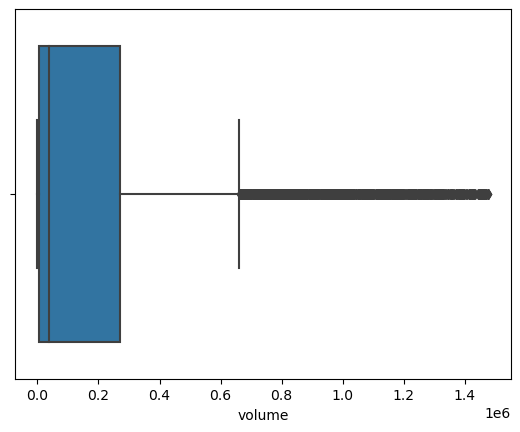

In [61]:
#let's visualize after detecting outliers in volume
sns.boxplot(x='volume', data=df)

In [62]:
#Q1 and Q3 calculations, and the interquartile range (IQR) for the 'RSIadjclose15'
Q1_RSIadjclose15=df['RSIadjclose15'].quantile(0.25)
Q3_RSIadjclose15=df['RSIadjclose15'].quantile(0.75)
IQR_RSIadjclose15=Q3_RSIadjclose15 - Q1_RSIadjclose15
print(IQR_RSIadjclose15)

13.471827311791422


In [63]:
df = df [~((df['RSIadjclose15']<(Q1_RSIadjclose15-1.5*IQR_RSIadjclose15))|(df['RSIadjclose15']>(Q3_RSIadjclose15+1.5*IQR_RSIadjclose15)))]

<Axes: xlabel='RSIadjclose15'>

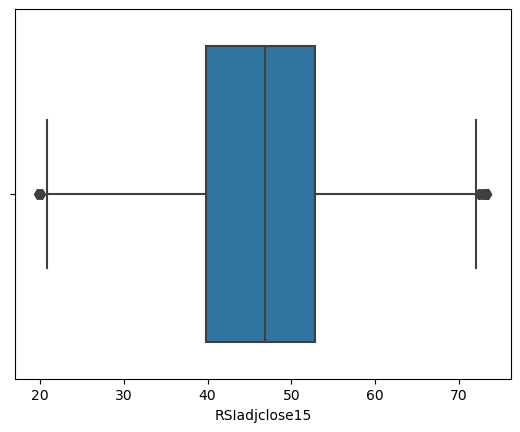

In [64]:
#let's visualize after detecting outliers in RSIadjclose15
sns.boxplot(x='RSIadjclose15', data=df)

In [65]:
#Q1 and Q3 calculations, and the interquartile range (IQR) for the 'RSIvolume15'
Q1_RSIvolume15=df['RSIvolume15'].quantile(0.25)
Q3_RSIvolume15=df['RSIvolume15'].quantile(0.75)
IQR_RSIvolume15=Q3_RSIvolume15 - Q1_RSIvolume15
print(IQR_RSIvolume15)

2.938712239323067


In [66]:
df = df [~((df['RSIvolume15']<(Q1_RSIvolume15-1.5*IQR_RSIvolume15))|(df['RSIvolume15']>(Q3_RSIvolume15+1.5*IQR_RSIvolume15)))]

<Axes: xlabel='RSIvolume15'>

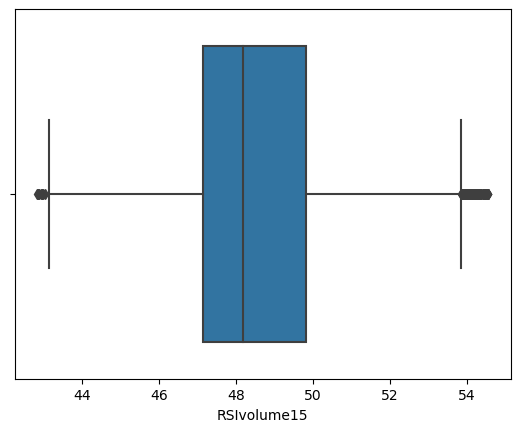

In [67]:
#let's visualize after detecting outliers in RSIvolume15
sns.boxplot(x='RSIvolume15', data=df)

In [68]:
#Q1 and Q3 calculations, and the interquartile range (IQR) for the 'RSIadjclose25'
Q1_RSIadjclose25=df['RSIadjclose25'].quantile(0.25)
Q3_RSIadjclose25=df['RSIadjclose25'].quantile(0.75)
IQR_RSIadjclose25=Q3_RSIadjclose25 - Q1_RSIadjclose25
print(IQR_RSIadjclose25)

9.177763800402715


In [69]:
df = df [~((df['RSIadjclose25']<(Q1_RSIadjclose25-1.5*IQR_RSIadjclose25))|(df['RSIadjclose25']>(Q3_RSIadjclose25+1.5*IQR_RSIadjclose25)))]

<Axes: xlabel='RSIadjclose25'>

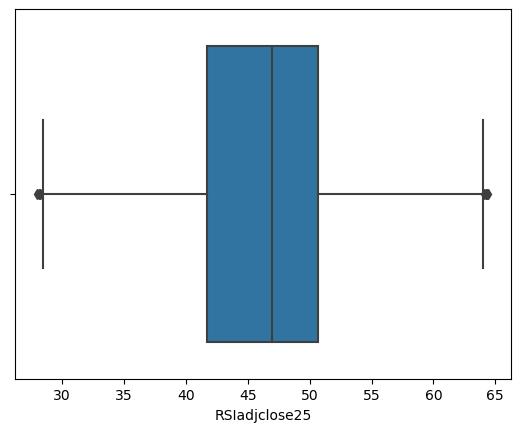

In [70]:
#let's visualize after detecting outliers in RSIadjclose25
sns.boxplot(x='RSIadjclose25', data=df)

In [71]:
#Q1 and Q3 calculations, and the interquartile range (IQR) for the 'stochastic-k-15'
Q1_stochastic_k15=df['stochastic-k-15'].quantile(0.25)
Q3_stochastic_k15=df['stochastic-k-15'].quantile(0.75)
IQR_stochastic_k15=Q3_stochastic_k15 - Q1_stochastic_k15
print(IQR_stochastic_k15)

46.19891345151917


In [72]:
df = df [~((df['stochastic-k-15']<(Q1_stochastic_k15-1.5*IQR_stochastic_k15))|(df['stochastic-k-15']>(Q3_stochastic_k15+1.5*IQR_stochastic_k15)))]

<Axes: xlabel='stochastic-k-15'>

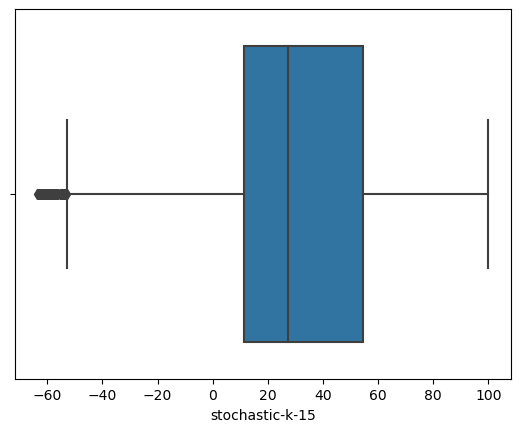

In [73]:
#let's visualize after detecting outliers in stochastic-k-15
sns.boxplot(x='stochastic-k-15', data=df)

In [74]:
#Q1 and Q3 calculations, and the interquartile range (IQR) for the 'stochastic-d-15'
Q1_stochastic_d15=df['stochastic-d-15'].quantile(0.25)
Q3_stochastic_d15=df['stochastic-d-15'].quantile(0.75)
IQR_stochastic_d15=Q3_stochastic_d15 - Q1_stochastic_d15
print(IQR_stochastic_d15)

40.82236303073853


In [75]:
df = df [~((df['stochastic-d-15']<(Q1_stochastic_d15-1.5*IQR_stochastic_d15))|(df['stochastic-d-15']>(Q3_stochastic_d15+1.5*IQR_stochastic_d15)))]

<Axes: xlabel='stochastic-d-15'>

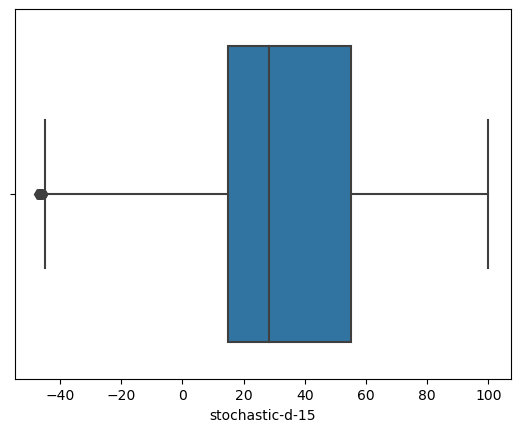

In [76]:
#let's visualize after detecting outliers in stochastic-d-15
sns.boxplot(x='stochastic-d-15', data=df)

In [77]:
#Q1 and Q3 calculations, and the interquartile range (IQR) for the 'stochastic-kd-15'
Q1_stochastic_kd_15=df['stochastic-kd-15'].quantile(0.25)
Q3_stochastic_kd_15=df['stochastic-kd-15'].quantile(0.75)
IQR_stochastic_kd_15=Q3_stochastic_kd_15 - Q1_stochastic_kd_15
print(IQR_stochastic_kd_15)

10.907800160283866


In [78]:
df = df [~((df['stochastic-kd-15']<(Q1_stochastic_kd_15-1.5*IQR_stochastic_kd_15))|(df['stochastic-kd-15']>(Q3_stochastic_kd_15+1.5*IQR_stochastic_kd_15)))]

<Axes: xlabel='stochastic-kd-15'>

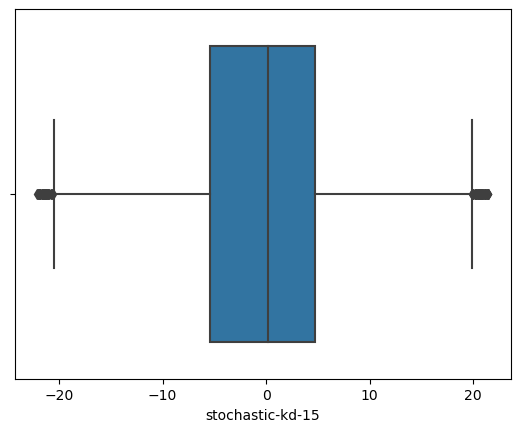

In [79]:
#let's visualize after detecting outliers in stochastic-kd-15
sns.boxplot(x='stochastic-kd-15', data=df)

In [80]:
#Q1 and Q3 calculations, and the interquartile range (IQR) for the 'volumenrelativo'
Q1_volumenrelativo=df['volumenrelativo'].quantile(0.25)
Q3_volumenrelativo=df['volumenrelativo'].quantile(0.75)
IQR_volumenrelativo=Q3_volumenrelativo - Q1_volumenrelativo
print(IQR_volumenrelativo)

0.8040805715486306


In [81]:
df = df [~((df['volumenrelativo']<(Q1_volumenrelativo-1.5*IQR_volumenrelativo))|(df['volumenrelativo']>(Q3_volumenrelativo+1.5*IQR_volumenrelativo)))]

<Axes: xlabel='volumenrelativo'>

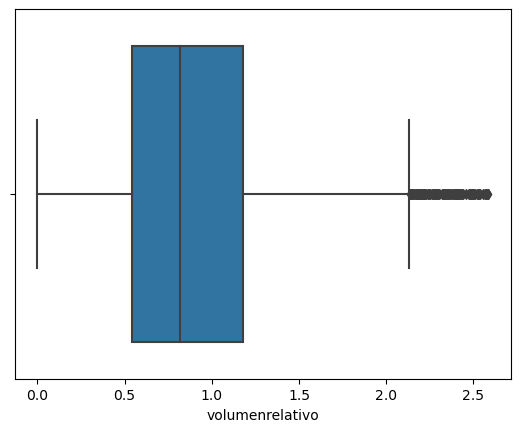

In [82]:
#let's visualize after detecting outliers in volumenrelativo
sns.boxplot(x='volumenrelativo', data=df)

In [83]:
#Q1 and Q3 calculations, and the interquartile range (IQR) for the 'volumenrelativo'
Q1_diff=df['diff'].quantile(0.25)
Q3_diff=df['diff'].quantile(0.75)
IQR_diff=Q3_diff - Q1_diff
print(IQR_diff)

0.6112670898437491


In [84]:
df = df [~((df['diff']<(Q1_diff-1.5*IQR_diff))|(df['diff']>(Q3_diff+1.5*IQR_diff)))]

<Axes: xlabel='diff'>

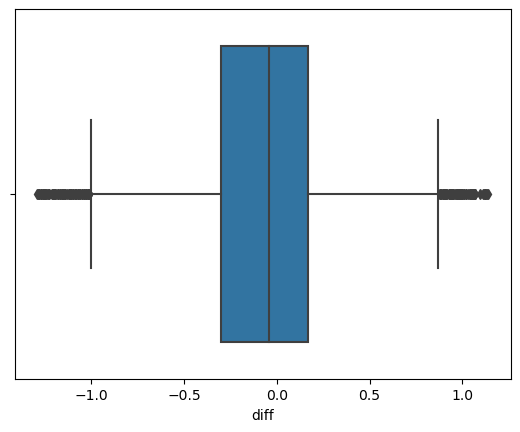

In [85]:
#let's visualize after detecting outliers in diff
sns.boxplot(x='diff', data=df)

In [86]:
#Q1 and Q3 calculations, and the interquartile range (IQR) for the 'volumenrelativo'
Q1_INCREMENTO=df['INCREMENTO'].quantile(0.25)
Q3_INCREMENTO=df['INCREMENTO'].quantile(0.75)
IQR_INCREMENTO=Q3_INCREMENTO - Q1_INCREMENTO
print(IQR_INCREMENTO)

6.547764625390792


In [87]:
df = df [~((df['INCREMENTO']<(Q1_INCREMENTO-1.5*IQR_INCREMENTO))|(df['INCREMENTO']>(Q3_INCREMENTO+1.5*IQR_INCREMENTO)))]

<Axes: xlabel='INCREMENTO'>

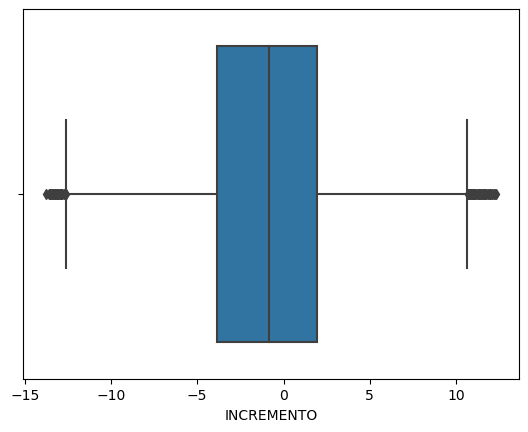

In [88]:
#let's visualize after detecting outliers in INCREMENTO
sns.boxplot(x='INCREMENTO', data=df)

# MinMaxScaler for the column volume:
1-Scaling Range: Scales the data to a specified range, typically [0, 1].

2-Distribution: Suitable for data with unknown or non-normal distributions.

3-Outliers: Sensitive to outliers since it is influenced by the range of the data.

4-Output Range: The output range is bounded between the specified minimum and maximum values.

In [89]:
#Extract the 'volume' column
feature = df['volume']

# Reshape the 'volume' column to a 2D array
feature_reshaped = feature.values.reshape(-1, 1)

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to your data and transform the data
df['scaled_volume'] = scaler.fit_transform(feature_reshaped)

# Print the original and scaled data
print("Original data:")
print(df['volume'])

print("\nscaled volume:")
print(df['scaled_volume'])

Original data:
2       103100
3       173600
4       137800
5       116700
7       136900
         ...  
7776      4900
7777      9200
7778     15200
7779      7100
7780      7100
Name: volume, Length: 3204, dtype: int64

scaled volume:
2       0.069832
3       0.117583
4       0.093335
5       0.079044
7       0.092726
          ...   
7776    0.003319
7777    0.006231
7778    0.010295
7779    0.004809
7780    0.004809
Name: scaled_volume, Length: 3204, dtype: float64


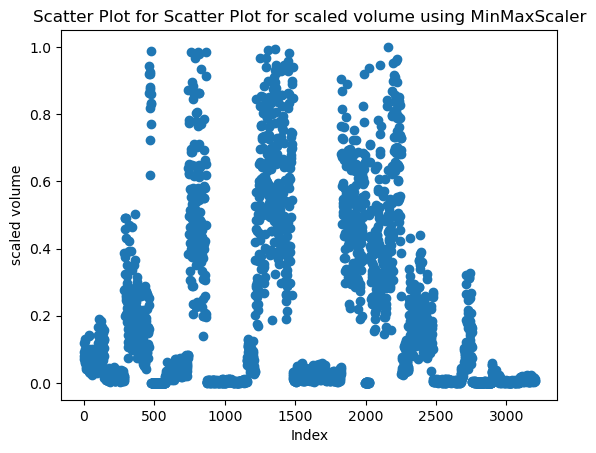

In [90]:
# Create a scatter plot for 'scaled_volume'
plt.scatter(range(len(df)), df['scaled_volume'])
plt.title('Scatter Plot for Scatter Plot for scaled volume using MinMaxScaler')
plt.xlabel('Index')
plt.ylabel('scaled volume')
plt.show()

# StandardScaler for the column volume:

1-Mean and Variance: Scales the data to have a mean of 0 and a standard deviation of 1.

2-Distribution: Suitable for data that is approximately normally distributed.

3-Outliers: Not sensitive to outliers.

4-Output Range: The output range is unbounded, and it can include negative values.

In [91]:
# Extract the 'volume' column
feature = df['volume']

# Reshape the 'volume' column to a 2D array
feature_reshaped = feature.values.reshape(-1, 1)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your data and transform the data
df['standardized_volume'] = scaler.fit_transform(feature_reshaped)

# Print the original and standardized data
print("Original data:")
print(df['volume'])
print("\nStandardized volume:")
print(df['standardized_volume'])

Original data:
2       103100
3       173600
4       137800
5       116700
7       136900
         ...  
7776      4900
7777      9200
7778     15200
7779      7100
7780      7100
Name: volume, Length: 3204, dtype: int64

Standardized volume:
2      -0.417839
3      -0.222379
4      -0.321634
5      -0.380133
7      -0.324129
          ...   
7776   -0.690098
7777   -0.678177
7778   -0.661542
7779   -0.683999
7780   -0.683999
Name: standardized_volume, Length: 3204, dtype: float64


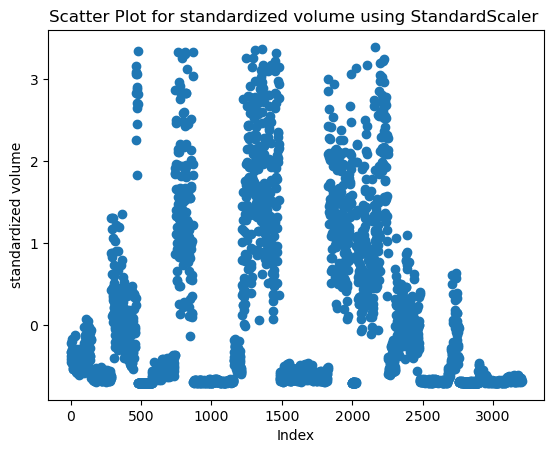

In [92]:
# Create a scatter plot for 'standardized volume'
plt.scatter(range(len(df)), df['standardized_volume'])
plt.title('Scatter Plot for standardized volume using StandardScaler ')
plt.xlabel('Index')
plt.ylabel('standardized volume')
plt.show()

# Decision Criteria:

1-Use StandardScaler when your data has a normal distribution, and you want to maintain information about outliers.

2-Use MinMaxScaler when your data has unknown or non-normal distributions, and you want to bound the values within a specific range.

# Data Visualization

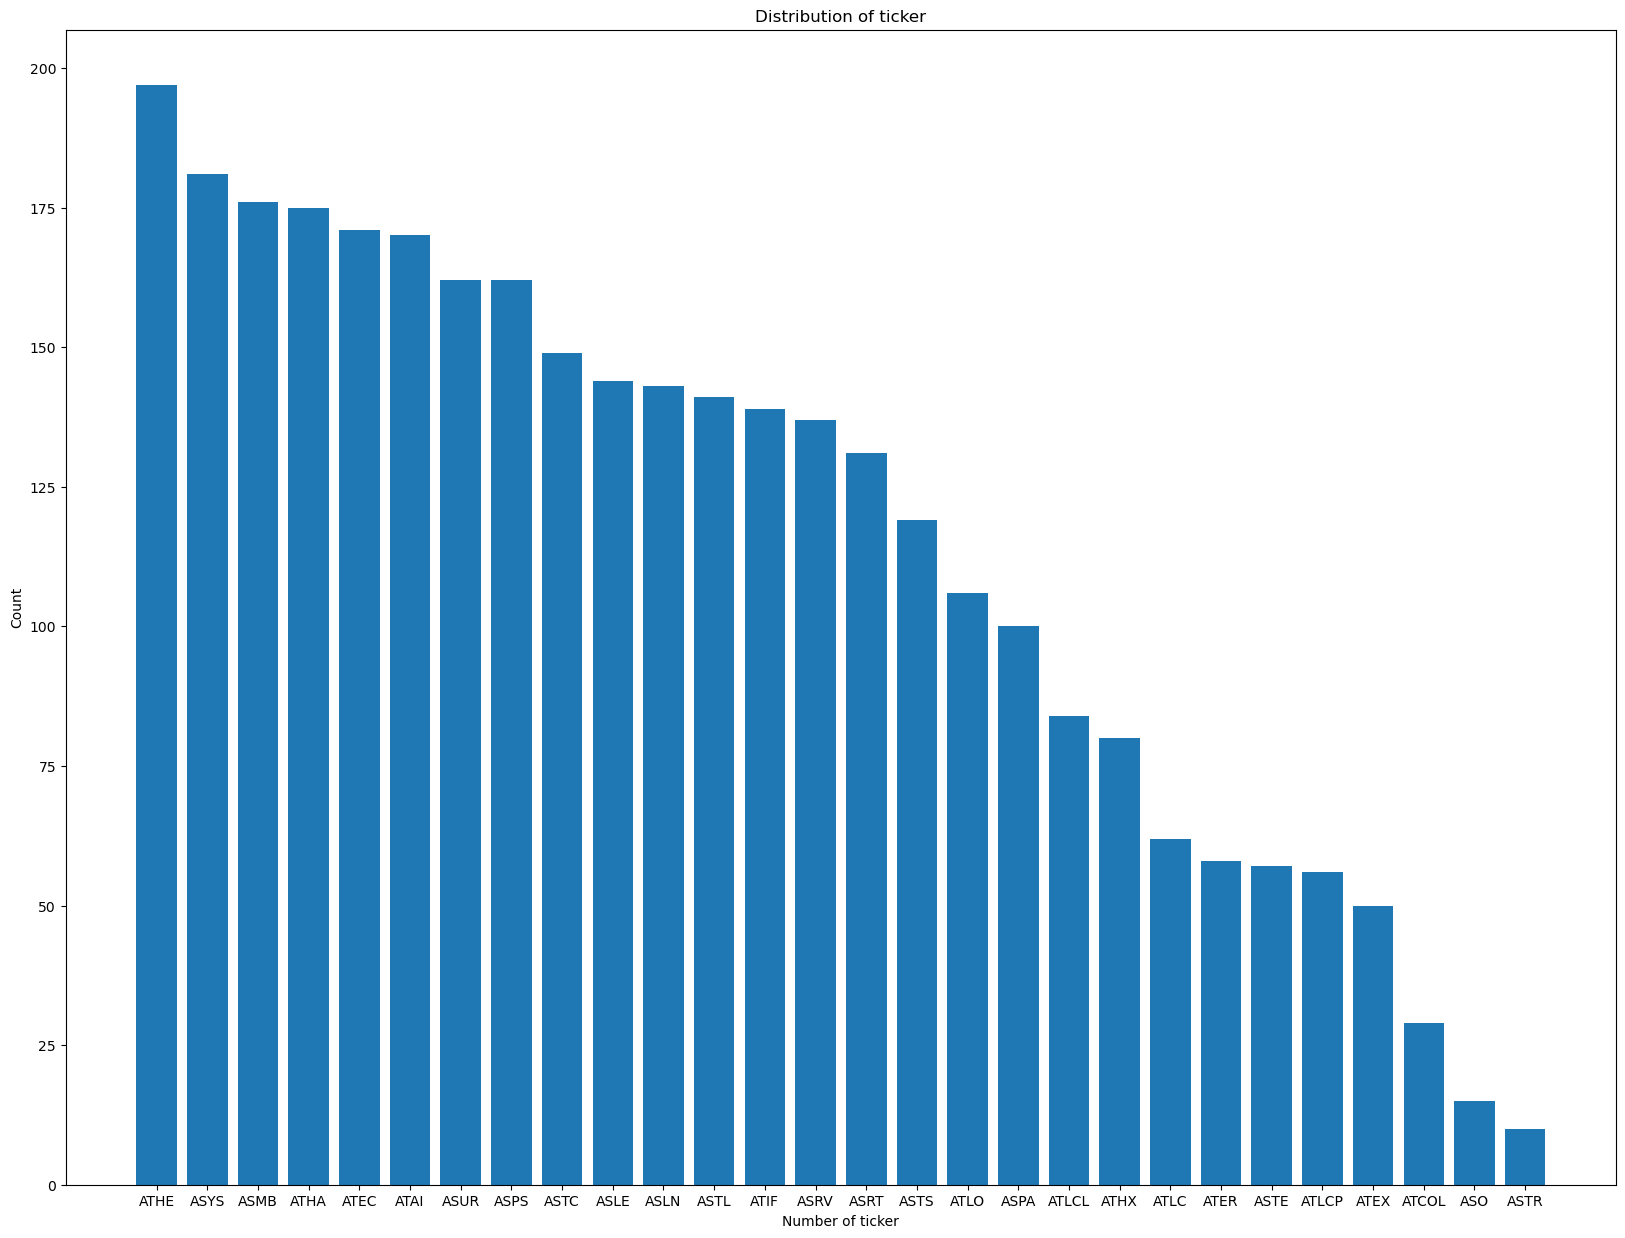

In [93]:
# visualization of Distribution of ticker
ticker_counts = df['ticker'].value_counts()
plt.figure(figsize=(20, 15))
plt.bar(ticker_counts.index, ticker_counts.values)
plt.xlabel('Number of ticker')
plt.ylabel('Count')
plt.title('Distribution of ticker')
plt.show()

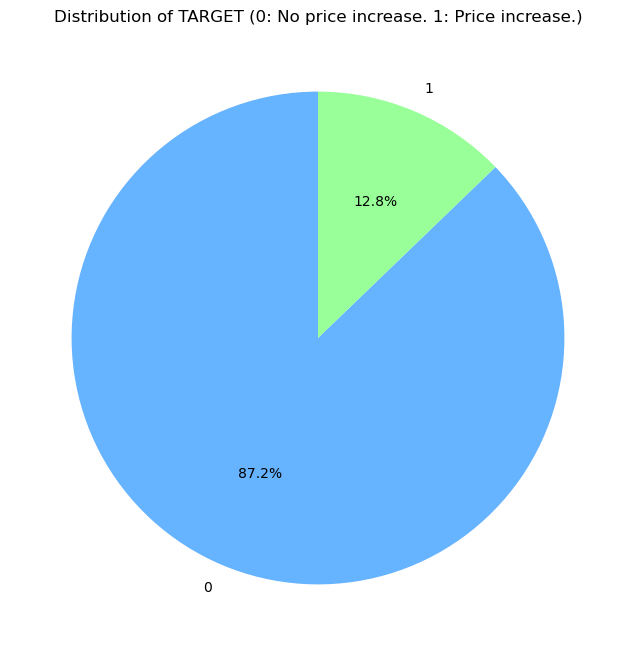

In [94]:
# visualization of Distribution of TARGET
TARGET_counts = df['TARGET'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(TARGET_counts, labels=TARGET_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Distribution of TARGET (0: No price increase. 1: Price increase.)')
plt.show()

# calculate the maximum and minimum values for each day

In [95]:
# the list of column names to plot
columns = ['high', 'low', 'open', 'close', 'adjclose', 'volume', 'RSIadjclose15', 'RSIvolume15', 'RSIadjclose25', 'stochastic-kd-15', 'volumenrelativo', 'diff', 'INCREMENTO', 'scaled_volume', 'standardized_volume']

# Create an empty DataFrame to store the results
daily_stats = pd.DataFrame()

# for loop that will Calculate Max & Min for each column
for column in columns:
    # Calculate the maximum and minimum values for each column
    max_values = df.groupby(df['day'])[column].max()
    min_values = df.groupby(df['day'])[column].min()
    
    # Append the results to the daily_stats DataFrame
    daily_stats[f'Max_{column}'] = max_values
    daily_stats[f'Min_{column}'] = min_values

# Print the resulting DataFrame
print(daily_stats)

      Max_high  Min_high    Max_low  Min_low   Max_open  Min_open  Max_close  \
day                                                                            
1    45.345001     0.630  43.500000    0.580  44.619999     0.610  44.959999   
2    44.029999     0.640  43.150002    0.590  43.700001     0.600  43.270000   
3    44.330002     0.580  43.060001    0.540  43.650002     0.552  43.900002   
4    44.349998     1.080  42.529999    1.000  42.939999     1.080  44.070000   
5    43.169998     1.190  41.040001    1.100  42.470001     1.190  42.320000   
6    44.900002     1.120  42.619999    1.050  44.070000     1.100  43.189999   
7    45.290001     1.110  44.009998    1.050  44.959999     1.060  44.560001   
8    44.810001     1.090  43.060001    1.010  44.049999     1.060  44.180000   
9    43.619999     1.060  41.230000    1.010  43.619999     1.040  41.529999   
10   44.764999     1.090  43.160000    1.020  44.709999     1.080  43.799999   
11   44.990002     1.380  44.000000    1

# calculate the maximum and minimum values for each month

In [96]:
# the list of column names to plot
columns = ['high', 'low', 'open', 'close', 'adjclose', 'volume', 'RSIadjclose15', 'RSIvolume15', 'RSIadjclose25', 'stochastic-kd-15', 'volumenrelativo', 'diff', 'INCREMENTO', 'scaled_volume', 'standardized_volume']

# Create an empty DataFrame to store the results
daily_stats = pd.DataFrame()

# for loop that will Calculate Max & Min for each column
for column in columns:
    # Calculate the maximum and minimum values for each column
    max_values = df.groupby(df['month'])[column].max()
    min_values = df.groupby(df['month'])[column].min()
    
    # Append the results to the daily_stats DataFrame
    daily_stats[f'Max_{column}'] = max_values
    daily_stats[f'Min_{column}'] = min_values

# Print the resulting DataFrame
print(daily_stats)

        Max_high  Min_high    Max_low  Min_low   Max_open  Min_open  \
month                                                                 
1      38.500000     1.850  36.770000    1.730  37.669998     1.740   
2      24.250000     1.560  22.750000    1.500  24.250000     1.530   
3      46.759998     1.540  44.779999    1.450  45.360001     1.510   
4      45.980000     1.920  43.900002    1.740  44.750000     1.830   
5      44.790001     1.570  42.790001    1.360  43.110001     1.410   
6      44.139999     1.900  41.939999    1.860  43.889999     1.880   
7      45.259998     1.350  43.790001    1.270  43.790001     1.350   
8      46.180000     1.480  45.189999    1.390  45.570000     1.440   
9      38.410000     1.520  36.759998    1.490  37.630001     1.520   
10     45.570000     1.080  44.009998    1.000  45.430000     1.030   
11     44.810001     0.520  43.500000    0.492  44.470001     0.497   
12     44.900002     0.436  42.799999    0.420  44.619999     0.430   

     

# calculate the maximum and minimum values for each year

In [97]:
# the list of column names to plot
columns = ['high', 'low', 'open', 'close', 'adjclose', 'volume', 'RSIadjclose15', 'RSIvolume15', 'RSIadjclose25', 'stochastic-kd-15', 'volumenrelativo', 'diff', 'INCREMENTO', 'scaled_volume', 'standardized_volume']

# Create an empty DataFrame to store the results
daily_stats = pd.DataFrame()

# for loop that will Calculate Max & Min for each column
for column in columns:
    # Calculate the maximum and minimum values for each column
    max_values = df.groupby(df['year'])[column].max()
    min_values = df.groupby(df['year'])[column].min()
    
    # Append the results to the daily_stats DataFrame
    daily_stats[f'Max_{column}'] = max_values
    daily_stats[f'Min_{column}'] = min_values

# Print the resulting DataFrame
print(daily_stats)

       Max_high  Min_high    Max_low  Min_low  Max_open  Min_open  Max_close  \
year                                                                           
2022  46.759998     0.436  45.189999     0.42     45.57      0.43  45.349998   

      Min_close  Max_adjclose  Min_adjclose  ...  Max_volumenrelativo  \
year                                         ...                        
2022       0.42     45.073704          0.42  ...               2.5853   

      Min_volumenrelativo  Max_diff  Min_diff  Max_INCREMENTO  Min_INCREMENTO  \
year                                                                            
2022                  0.0      1.12     -1.29       12.339743      -13.793106   

      Max_scaled_volume  Min_scaled_volume  Max_standardized_volume  \
year                                                                  
2022                1.0                0.0                 3.389628   

      Min_standardized_volume  
year                           
2022             

In [98]:
#the values of column year
df['year'].unique()

array([2022])

# Visualization

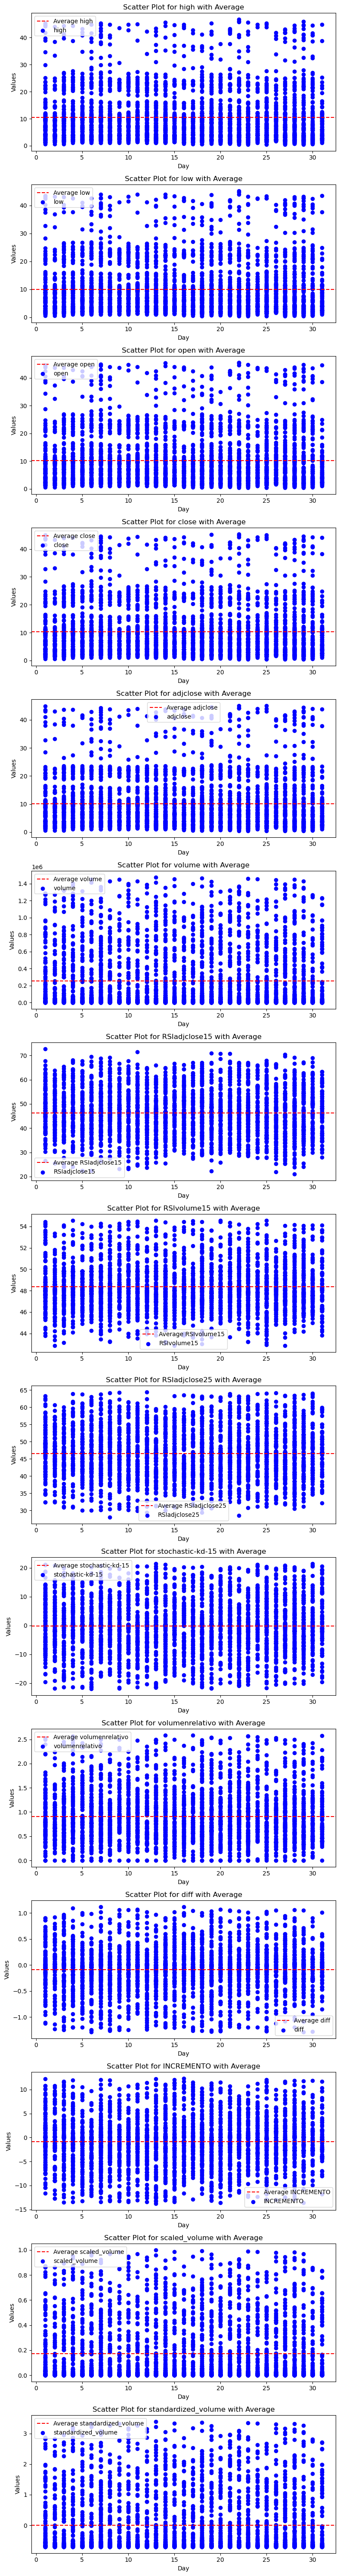

In [99]:
# the list of column names to plot
columns_to_plot = ['high', 'low', 'open', 'close','adjclose', 'volume','RSIadjclose15', 'RSIvolume15', 'RSIadjclose25','stochastic-kd-15', 'volumenrelativo', 'diff', 'INCREMENTO', 'scaled_volume', 'standardized_volume']

# Set up individual subplots for each column
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(8, 4 * len(columns_to_plot)))

# Create individual scatter plots for each column in the for loop
for i, column in enumerate(columns_to_plot):
    # Calculate the average for each column
    average_column = df[column].mean()
    
    # Plot the average as a horizontal line
    axes[i].axhline(y=average_column, color='red', linestyle='--', label=f'Average {column}')
    
    # Plot the original data as scatter plot
    axes[i].scatter(df['day'], df[column], color='blue', label=column, marker='o')
    
    axes[i].set_xlabel('Day')
    axes[i].set_ylabel('Values')
    axes[i].set_title(f'Scatter Plot for {column} with Average')
    axes[i].legend()

plt.tight_layout()
plt.show()

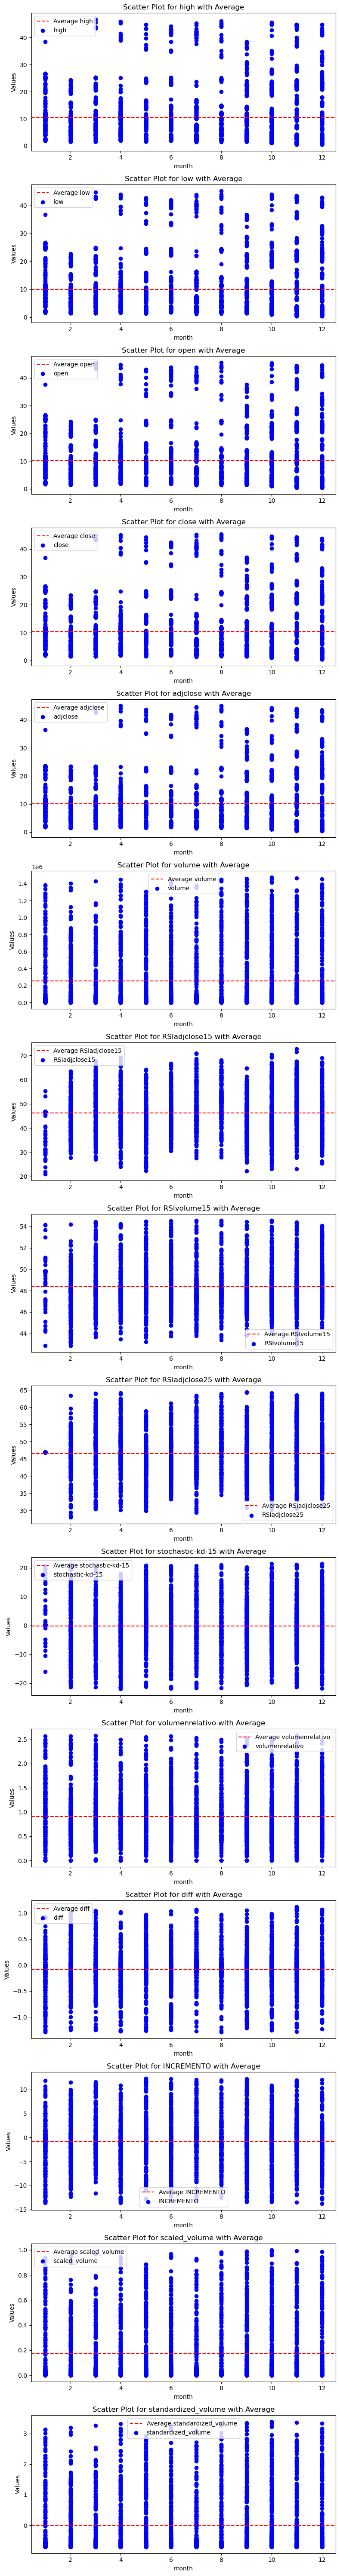

In [100]:
# the list of column names to plot
columns_to_plot = ['high', 'low', 'open', 'close','adjclose', 'volume','RSIadjclose15', 'RSIvolume15', 'RSIadjclose25','stochastic-kd-15', 'volumenrelativo', 'diff', 'INCREMENTO', 'scaled_volume', 'standardized_volume']

# Set up individual subplots for each column
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(8, 4 * len(columns_to_plot)))

# Create individual scatter plots for each column in the for loop
for i, column in enumerate(columns_to_plot):
    # Calculate the average for each column
    average_column = df[column].mean()
    
    # Plot the average as a horizontal line
    axes[i].axhline(y=average_column, color='red', linestyle='--', label=f'Average {column}')
    
    # Plot the original data as scatter plot
    axes[i].scatter(df['month'], df[column], color='blue', label=column, marker='o')
    
    axes[i].set_xlabel('month')
    axes[i].set_ylabel('Values')
    axes[i].set_title(f'Scatter Plot for {column} with Average')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Distribution of Tickers Across Years

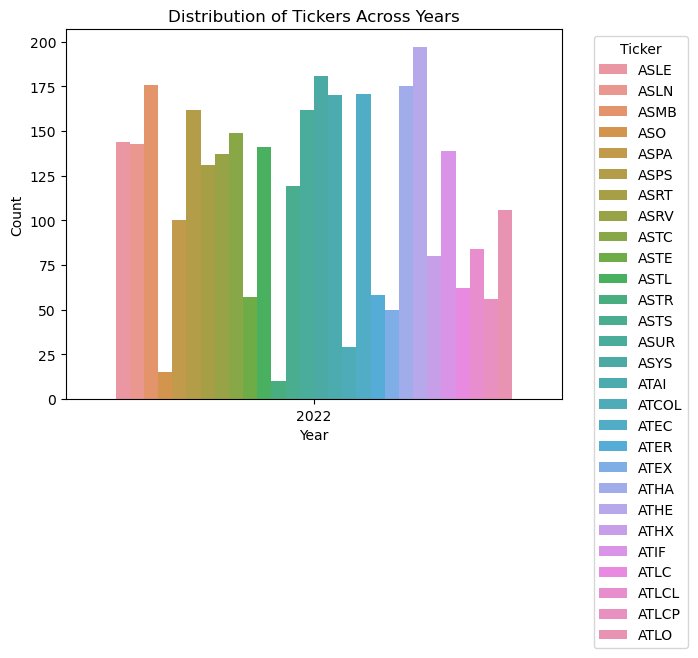

In [101]:
#Distribution of Tickers Across Years
sns.countplot(data=df, x='year', hue='ticker')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Tickers Across Years')
plt.legend(title='Ticker', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Distribution of Tickers Across Target

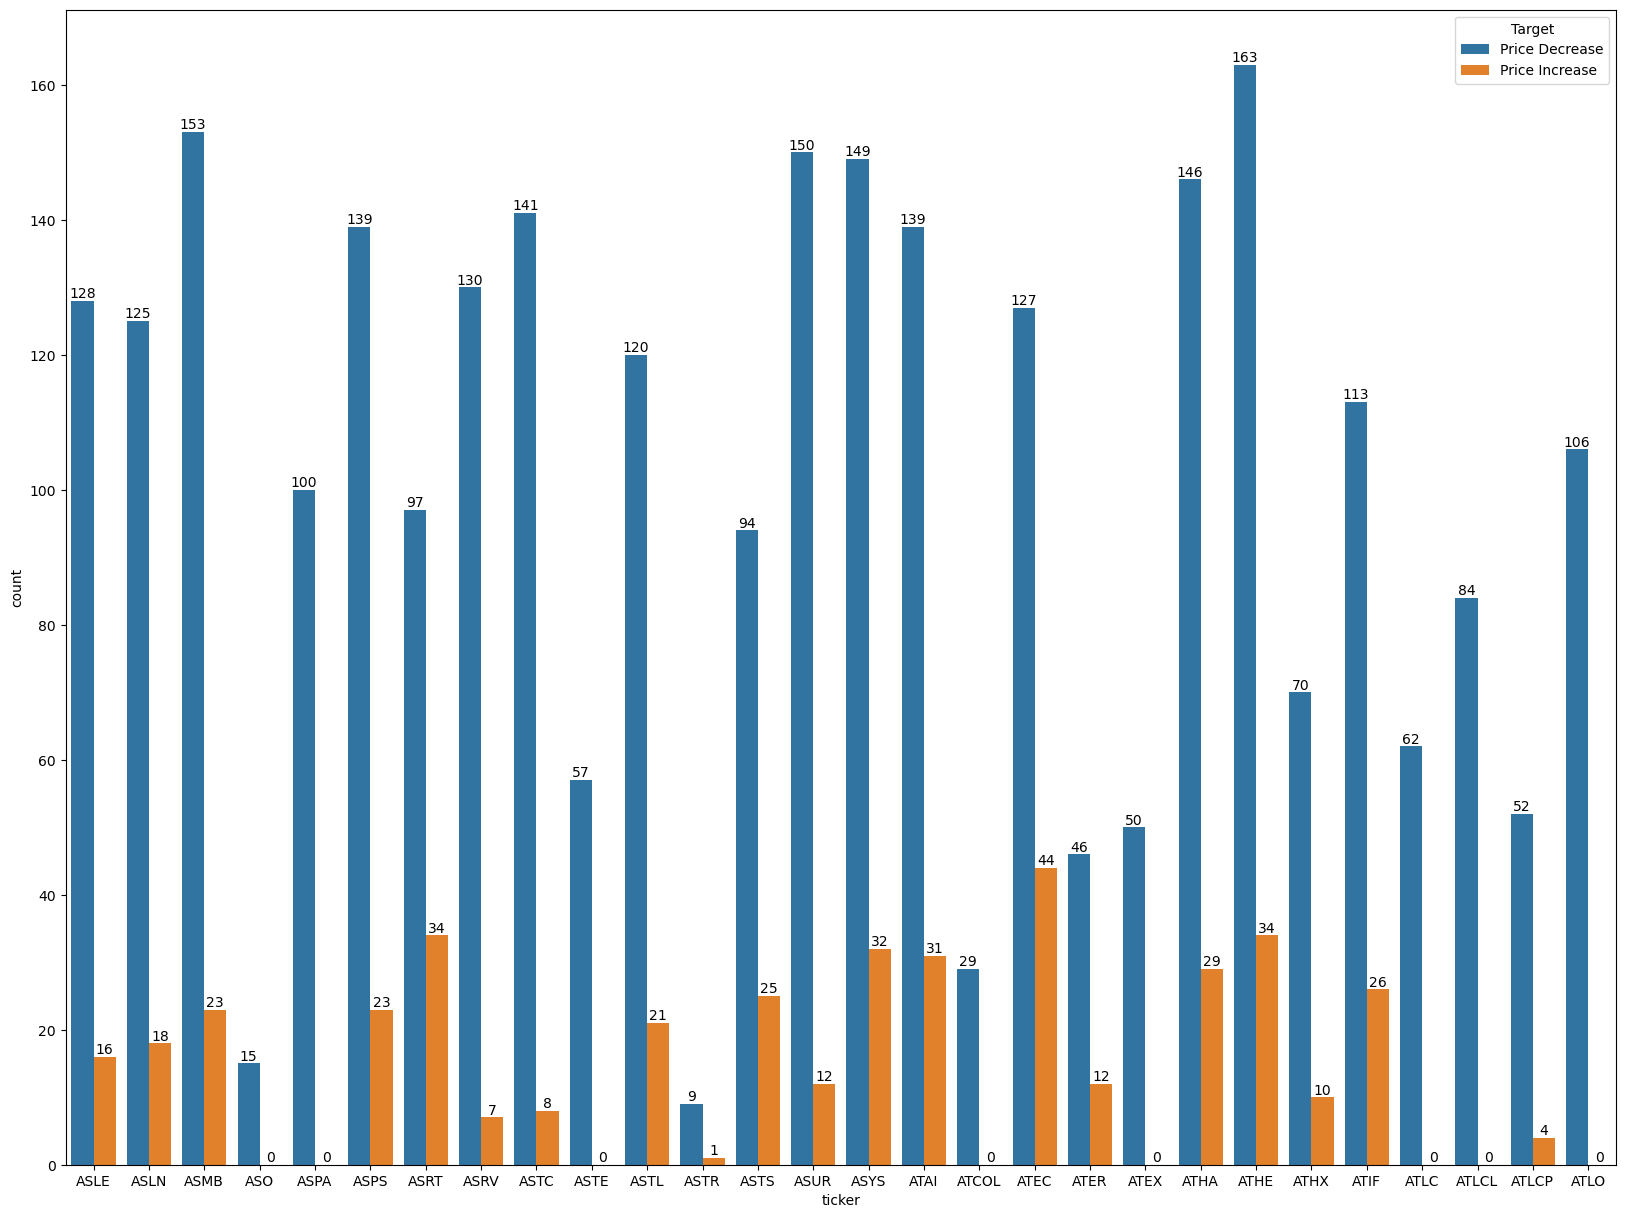

In [102]:
##Distribution of Tickers Across Target
plt.figure(figsize=(20, 15))

legend_labels = {0: 'Price Decrease', 1: 'Price Increase'}
ax = sns.countplot(data = df, x = 'ticker',hue = 'TARGET')

# Adding Target with custom labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [legend_labels[int(label)] for label in labels], title='Target')

for bars in ax.containers:
    ax.bar_label(bars)

# label encoding for ticker

In [103]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Apply label encoding to categorical column
df['ticker_encoded'] = label_encoder.fit_transform(df['ticker'])

In [104]:
#let's see ticker_encoded
df['ticker_encoded']

2        0
3        0
4        0
5        0
7        0
        ..
7776    27
7777    27
7778    27
7779    27
7780    27
Name: ticker_encoded, Length: 3204, dtype: int32

In [105]:
df

,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,RSIadjclose25,...,volumenrelativo,diff,INCREMENTO,TARGET,day,month,year,scaled_volume,standardized_volume,ticker_encoded
2,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,46.817434,49.814790,46.966016,...,0.889560,-0.930000,-5.201344,0,5,1,2022,0.069832,-0.417839,0
3,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,46.817434,49.814790,46.966016,...,1.497843,-0.360000,-2.177856,0,6,1,2022,0.117583,-0.222379,0
4,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,46.817434,49.814790,46.966016,...,1.188956,-0.120000,-0.758054,0,7,1,2022,0.093335,-0.321634,0
5,15.680000,16.010000,15.170000,15.860000,15.860000,116700,ASLE,46.817434,49.814790,46.966016,...,1.006903,-0.460000,-2.818628,0,10,1,2022,0.079044,-0.380133,0
7,16.389999,16.580000,15.970000,16.020000,16.020000,136900,ASLE,46.817434,49.814790,46.966016,...,1.181191,-1.110001,-6.479863,0,12,1,2022,0.092726,-0.324129,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7776,23.250000,23.540001,23.250000,23.290001,22.699928,4900,ATLO,60.782255,47.081752,59.518051,...,0.333333,-0.259186,-2.674224,0,23,12,2022,0.003319,-0.690098,27
7777,23.350000,23.610001,23.250000,23.350000,22.758406,9200,ATLO,62.022801,47.747952,60.316762,...,0.625850,-0.259186,-2.674224,0,27,12,2022,0.006231,-0.678177,27
7778,23.450001,23.570000,23.219999,23.350000,22.758406,15200,ATLO,62.022801,48.713225,60.316762,...,1.034014,-0.259186,-2.674224,0,28,12,2022,0.010295,-0.661542,27
7779,23.330000,23.740000,23.330000,23.610001,23.011820,7100,ATLO,67.186408,47.445460,63.685794,...,0.482993,-0.259186,-2.674224,0,29,12,2022,0.004809,-0.683999,27


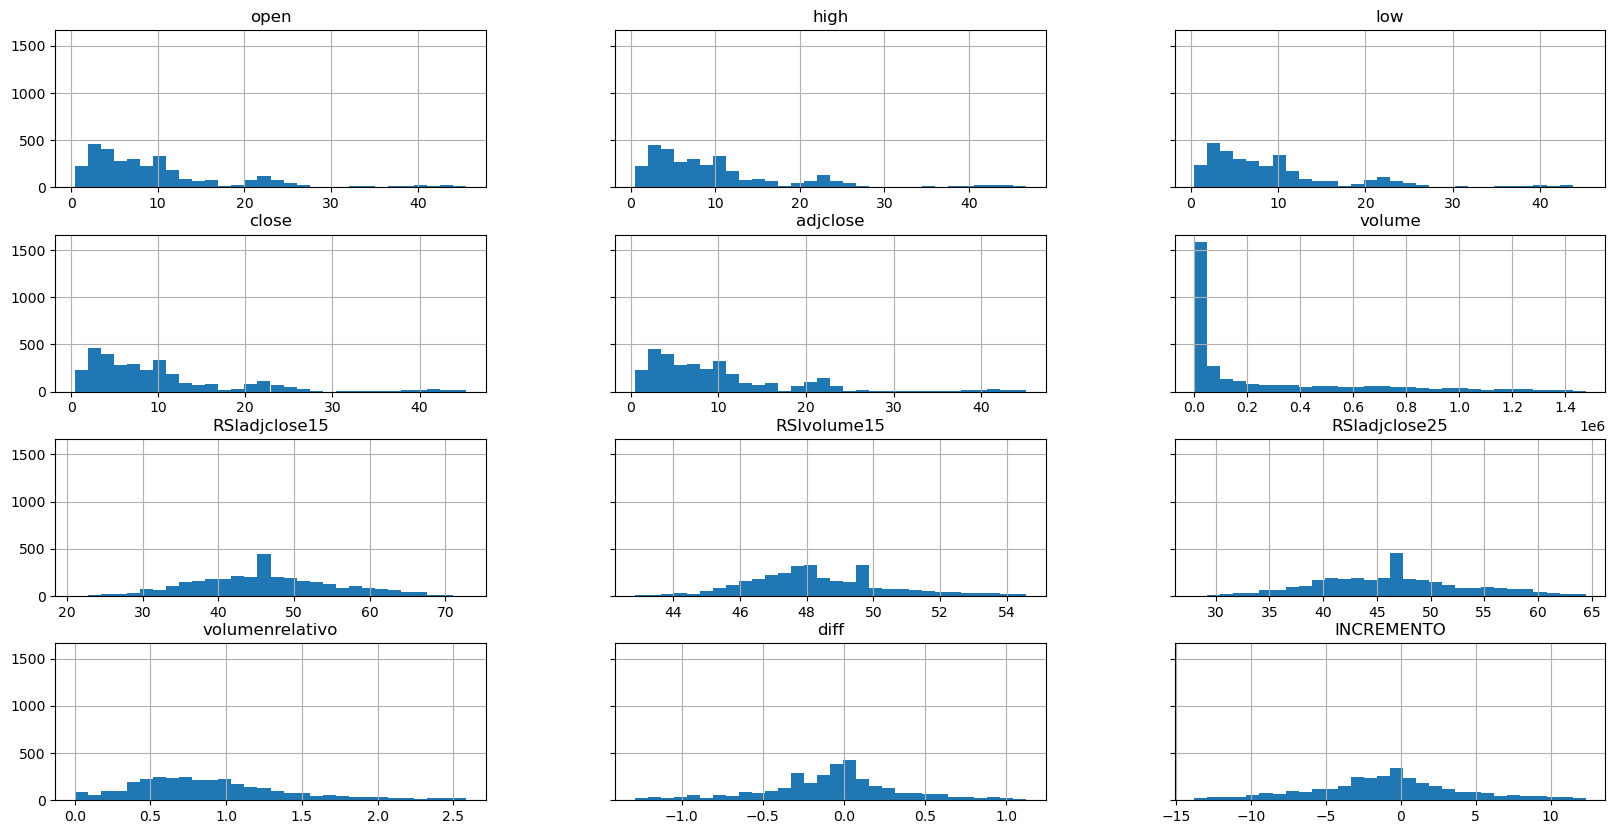

In [106]:
# Plot histograms for specific columns
hist = df[['open', 'high', 'low', 'close', 'adjclose', 'volume','RSIadjclose15', 'RSIvolume15', 'RSIadjclose25','volumenrelativo', 'diff', 'INCREMENTO']].hist(bins=30, sharey=True, figsize=(20, 10))

# Show the plots
plt.show()

# let's build the model

In [107]:
# building the model using DecisionTree for classification

X = df[['open', 'high', 'low', 'close'] ] # Features
y = df['TARGET']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = tree_model.predict(X_test)

# Evaluate the Decision Tree model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
classification_rep_tree = classification_report(y_test, y_pred_tree)

print("Decision Tree Model:")
print(f"Accuracy: {accuracy_tree:.2f}")
print("Confusion Matrix:\n", conf_matrix_tree)
print("Classification Report:\n", classification_rep_tree)

Decision Tree Model:
Accuracy: 0.80
Confusion Matrix:
 [[491  67]
 [ 64  19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       558
           1       0.22      0.23      0.22        83

    accuracy                           0.80       641
   macro avg       0.55      0.55      0.55       641
weighted avg       0.80      0.80      0.80       641



In [108]:
y_pred_tree

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

# Plot a bar chart comparing actual and predicted values

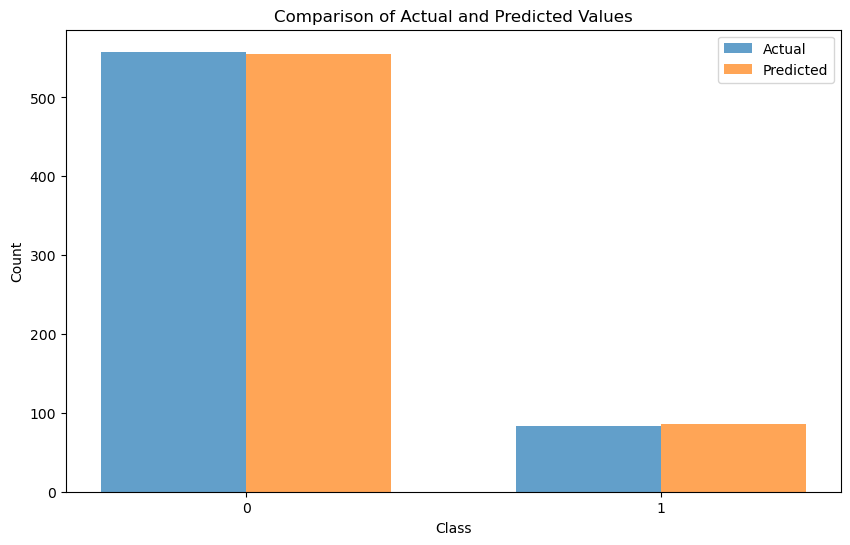

In [109]:
# Plot a bar chart comparing actual and predicted values
classes = np.unique(y_test)
fig, ax = plt.subplots(figsize=(10, 6))

width = 0.35
bar1 = ax.bar(classes - width/2, np.bincount(y_test), width, label='Actual', alpha=0.7)
bar2 = ax.bar(classes + width/2, np.bincount(y_pred_tree), width, label='Predicted', alpha=0.7)

ax.set_title('Comparison of Actual and Predicted Values')
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_xticks(classes)
ax.legend()

plt.show()

# confusion matrix

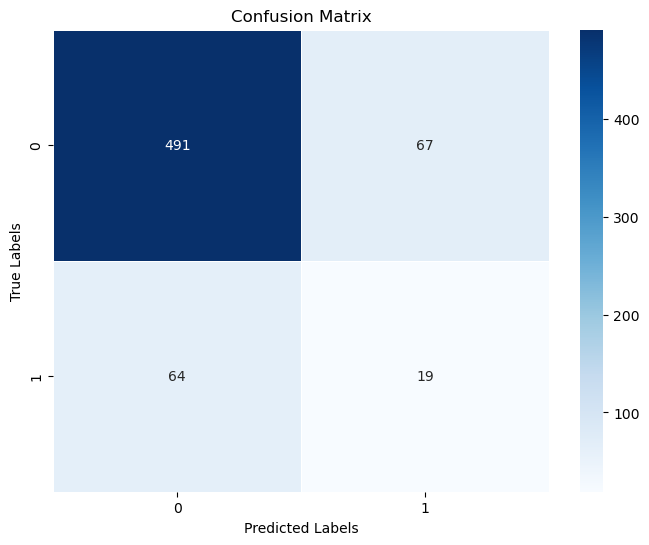

In [110]:
# visualize confusion matrix 
conf_matrix = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Thanks